In [81]:
'''
a) Cargá los datos en un data frame, inspeccionalo y caracterizalo.

b) ¿Cuáles son las variables que se encuentran relacionadas? ¿Cómo lo evaluarías gráficamente?

c) Usando un k=3 realizá el agrupamiento de los datos. Analizar y evaluar si el proceso de clustering fue correcto. 

d) Proponer un número de clusters (k) más apropiado, validarlo de forma gráfica. 

e) ¿Qué conclusión podés sacar de [este gráfico del codo](https://github.com/FundamentosInformaticaUCEMA/FI_Parcial2_2022_T1/blob/main/recursos/codo.jpg)?'''

'\na) Cargá los datos en un data frame, inspeccionalo y caracterizalo.\n\nb) ¿Cuáles son las variables que se encuentran relacionadas? ¿Cómo lo evaluarías gráficamente?\n\nc) Usando un k=3 realizá el agrupamiento de los datos. Analizar y evaluar si el proceso de clustering fue correcto. \n\nd) Proponer un número de clusters (k) más apropiado, validarlo de forma gráfica. \n\ne) ¿Qué conclusión podés sacar de [este gráfico del codo](https://github.com/FundamentosInformaticaUCEMA/FI_Parcial2_2022_T1/blob/main/recursos/codo.jpg)?'

In [82]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt 
import matplotlib.cm as cm 
import numpy as np
from scipy import stats

In [83]:
datos= pd.read_csv ("internet.csv")
datos

,ID,Nombre,Apellido,Ingreso,Gastos generales,Familiares a cargo,Accesibilidad a calle asfaltada,Otra empresa
0,1,Filia,Murrthum,26.50,15.75,False,False,False
1,2,Neysa,Attarge,723.06,475.84,True,True,False
2,3,Ervin,Keggin,692.55,410.67,False,True,True
3,4,Stacee,Foggo,815.42,403.88,True,True,True
4,5,Floyd,Borrett,672.00,504.42,False,False,True
...,...,...,...,...,...,...,...,...
1008,996,Danyette,Udden,NaN,962.80,False,True,True
1009,997,Earlie,Brumbie,2540.00,1176.52,True,False,False
1010,998,Rolland,Windram,1407.65,1066.44,True,False,True
1011,999,Effie,Barta,1724.77,1079.90,True,False,True


In [84]:
datos.describe()

,ID,Ingreso,Gastos generales
count,1013.000000,989.000000,989.000000
mean,497.454097,1138.740576,777.404702
std,288.968622,432.163759,362.098822
min,1.000000,26.500000,12.620000
25%,247.000000,771.060000,445.790000
50%,496.000000,1048.480000,618.710000
75%,747.000000,1498.870000,1098.650000
max,1000.000000,2672.670000,2318.530000


In [85]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               1013 non-null   int64  
 1   Nombre                           1013 non-null   object 
 2   Apellido                         1013 non-null   object 
 3   Ingreso                          989 non-null    float64
 4   Gastos generales                 989 non-null    float64
 5   Familiares a cargo               1013 non-null   bool   
 6   Accesibilidad a calle asfaltada  1013 non-null   bool   
 7   Otra empresa                     1013 non-null   bool   
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 42.7+ KB


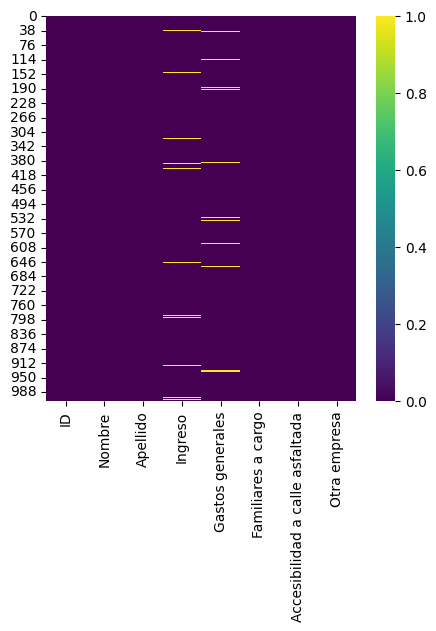

In [86]:
plt.figure(figsize=(5,5)) # siendo a el ancho y b el largo
no_nulls = sns.heatmap(datos.isnull(), cmap='viridis')
#esto es para graficar


In [87]:
figure = no_nulls.get_figure()    
figure.savefig('cuadro.png', dpi=300) 

In [88]:
columnas = list(datos.columns)

In [89]:
columnas

['ID',
 'Nombre',
 'Apellido',
 'Ingreso',
 'Gastos generales',
 'Familiares a cargo',
 'Accesibilidad a calle asfaltada',
 'Otra empresa']

In [90]:
del(columnas[0:3])
columnas

['Ingreso',
 'Gastos generales',
 'Familiares a cargo',
 'Accesibilidad a calle asfaltada',
 'Otra empresa']

In [91]:
del(columnas[2:5])
columnas

['Ingreso', 'Gastos generales']

In [92]:
def verificacion_de_medias(lista):
    test = {}
    for columna in lista:
        w, p = stats.shapiro(datos[columna].dropna())
        test[columna] = p
    return test

In [93]:
verificacion_de_medias(columnas)

{'Ingreso': 1.4977513182547376e-16, 'Gastos generales': 5.8741483453252786e-27}

In [94]:
datoslimpios= (datos[["Ingreso", "Gastos generales"]])

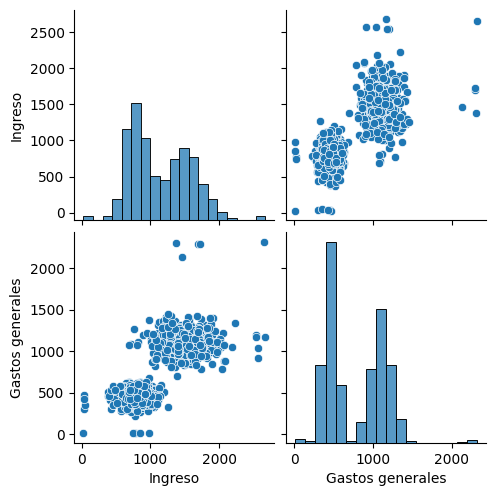

In [95]:
sns.pairplot(datoslimpios)
# outlier= el distinto 
# veo outlier 

In [96]:
(datoslimpios).quantile(0.05).to_dict()

{'Ingreso': 595.02, 'Gastos generales': 346.73199999999997}

In [97]:
Cs1 = datoslimpios["Ingreso"].quantile(0.95) # si sos mayyor a a 95 te vas 
Ci1 = datoslimpios["Ingreso"].quantile(0.05) #si sos menor a 5 te vas 
Cs2 = datoslimpios["Gastos generales"].quantile(0.95)
Ci2 = datoslimpios["Gastos generales"].quantile(0.05)

datoslimpios1 = datoslimpios[(datoslimpios["Ingreso"] >= Ci1) & (datoslimpios["Ingreso"] <= Cs1) & (datoslimpios["Gastos generales"] >= Ci2) & (datoslimpios["Gastos generales"] <= Cs2)].reset_index(drop=True)

In [98]:
datoslimpios1

,Ingreso,Gastos generales
0,723.06,475.84
1,692.55,410.67
2,815.42,403.88
3,672.00,504.42
4,804.80,391.03
...,...,...
776,1586.30,950.19
777,1443.28,854.31
778,1407.65,1066.44
779,1724.77,1079.90


In [99]:
datoslimpios2 = datoslimpios1.dropna().reset_index(drop=True)

In [100]:
datoslimpios3 = datoslimpios2.drop_duplicates().reset_index(drop=True)

In [101]:
datoslimpios3

,Ingreso,Gastos generales
0,723.06,475.84
1,692.55,410.67
2,815.42,403.88
3,672.00,504.42
4,804.80,391.03
...,...,...
765,1586.30,950.19
766,1443.28,854.31
767,1407.65,1066.44
768,1724.77,1079.90


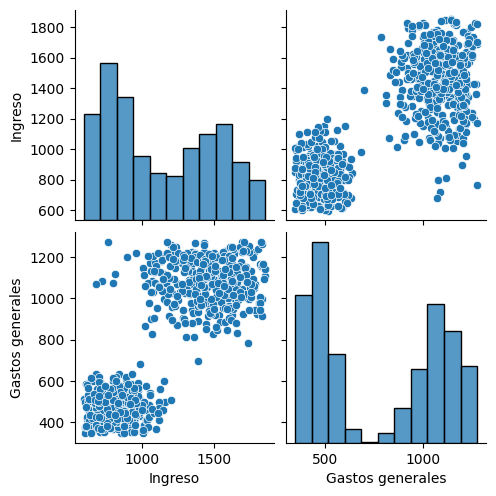

In [102]:
sns.pairplot(datoslimpios3)
#Eliminamos los outlier

In [103]:
datoslimpios4 = datoslimpios3[columnas]

In [104]:
datoslimpios4

,Ingreso,Gastos generales
0,723.06,475.84
1,692.55,410.67
2,815.42,403.88
3,672.00,504.42
4,804.80,391.03
...,...,...
765,1586.30,950.19
766,1443.28,854.31
767,1407.65,1066.44
768,1724.77,1079.90


<AxesSubplot: xlabel='Gastos generales', ylabel='Count'>

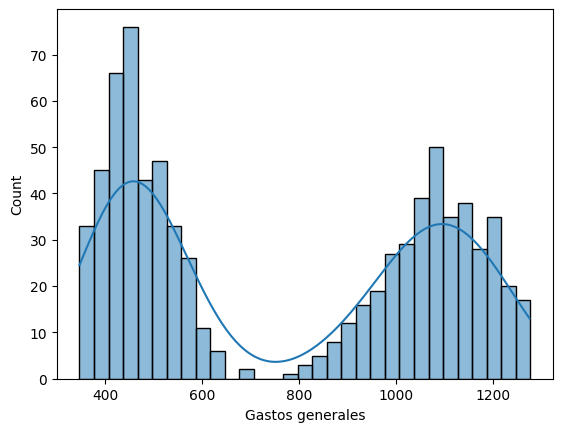

In [105]:
sns.histplot(data = datoslimpios4, x = "Gastos generales", binwidth=30 , kde = True)

In [106]:
scaler = StandardScaler()
df_escalado = scaler.fit_transform(datoslimpios4)

In [107]:
def inercias_por_k(df_escalado):
    inercias = {}
    for i in range(1,11):
        kmeans = KMeans(n_clusters = i, init="random", n_init=10, max_iter=300, random_state=123457)
        kmeans.fit(df_escalado)
        inercias[i] = kmeans.inertia_
    return inercias

In [108]:
inercias = inercias_por_k(df_escalado)

In [109]:
inercias

{1: 1540.0000000000002,
 2: 240.79953058177452,
 3: 151.4428409626412,
 4: 121.16628624682964,
 5: 96.40714243837037,
 6: 80.82241834022874,
 7: 72.82648616222562,
 8: 67.41957685127818,
 9: 60.19040807889323,
 10: 55.39909167064278}

In [110]:
df_inercias = pd.DataFrame(inercias.items(), columns=["K", "inercia"])

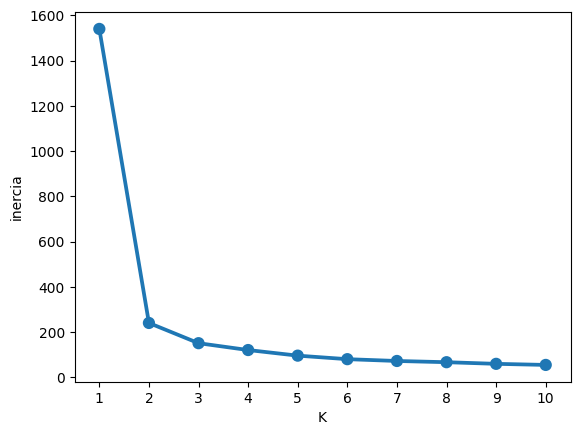

In [111]:
codo = sns.pointplot(data = df_inercias, x = "K", y = "inercia")

In [112]:
figure = codo.get_figure()    
figure.savefig('cuadro1.png', dpi=300) 

In [113]:
k = 2
kmeans = KMeans(n_clusters = k, init="random", n_init=10, max_iter=300, random_state=123457)
kmeans.fit(df_escalado)

KMeans(init='random', n_clusters=2, random_state=123457)

<AxesSubplot: >

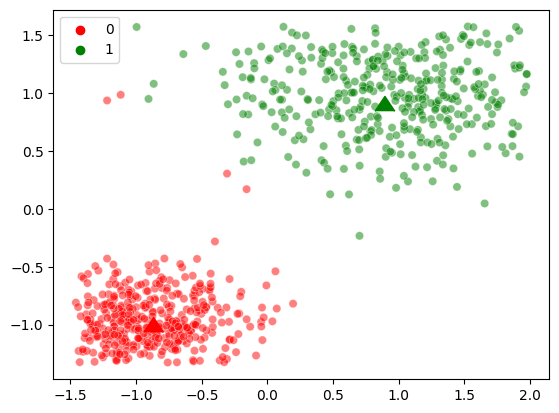

In [114]:
colores = ["red", "green"]
sns.scatterplot(x = df_escalado[:,0], y = df_escalado[:, 1], hue = kmeans.labels_, palette = colores, alpha = 0.5)
sns.scatterplot(x = kmeans.cluster_centers_[:,0], y = kmeans.cluster_centers_[:,1], zorder = 10, palette = colores, hue = [0, 1], legend = False, marker=6, s=200)

In [115]:
silhouette_avg = silhouette_score(df_escalado, kmeans.labels_)
sample_silhouette_values = silhouette_samples(df_escalado, kmeans.labels_)

In [116]:
def graficarSilhouette (k, labels, sample_silhouette_values, silhouette_avg):
  fig, ax1 = plt.subplots(1, 1)
  y_lower = 10
  for i in range(k):
      ith_cluster_silhouette_values = \
          sample_silhouette_values[labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i) / k)
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
      y_lower = y_upper + 10

  ax1.set_title("Plot del silhouette de cada cluster")
  ax1.set_xlabel("Coeficiente de silhouette")
  ax1.set_ylabel("Etiqueta del cluster")
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
  ax1.set_yticks([]) 

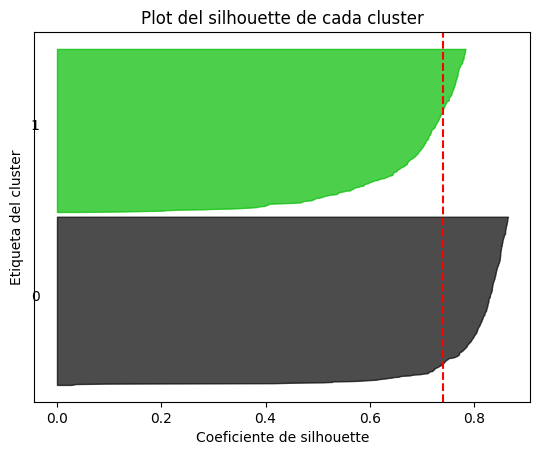

In [117]:
ola= graficarSilhouette (k, kmeans.labels_, sample_silhouette_values, silhouette_avg)

In [ ]:
k = 3
kmeans = KMeans(n_clusters = k, init="random", n_init=10, max_iter=300, random_state=123457)
kmeans.fit(df_escalado)

KMeans(init='random', n_clusters=3, random_state=123457)

<AxesSubplot: >

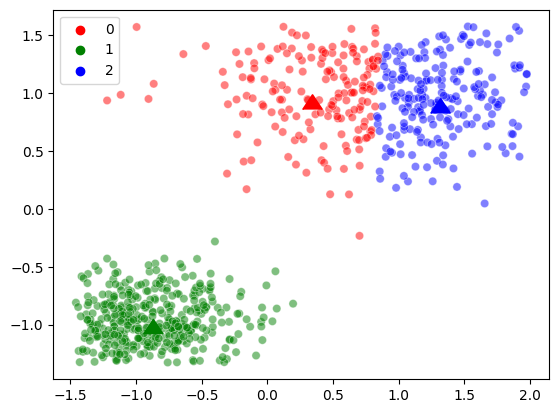

In [ ]:
colores = ["red", "green", "blue"]
sns.scatterplot(x = df_escalado[:,0], y = df_escalado[:, 1], hue = kmeans.labels_, palette = colores, alpha = 0.5)
sns.scatterplot(x = kmeans.cluster_centers_[:,0], y = kmeans.cluster_centers_[:,1], zorder = 10, palette = colores, hue = [0, 1, 2], legend = False, marker=6, s=200)

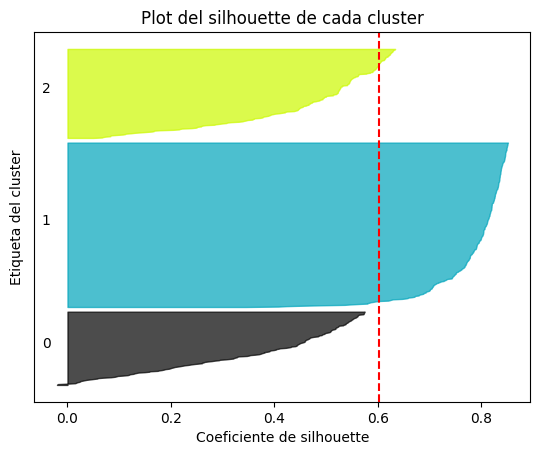

In [ ]:
silhouette_avg=silhouette_score(df_escalado, kmeans.labels_)
sample_silhouette_values= silhouette_samples(df_escalado, kmeans.labels_)



def graficarSilhouette (k, labels, sample_silhouette_values, silhouette_avg):
  fig, ax1 = plt.subplots(1, 1)
  y_lower = 10
  for i in range(k):
      ith_cluster_silhouette_values = \
          sample_silhouette_values[labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i) / k)
      ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
      y_lower = y_upper + 10

  ax1.set_title("Plot del silhouette de cada cluster")
  ax1.set_xlabel("Coeficiente de silhouette")
  ax1.set_ylabel("Etiqueta del cluster")
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
  ax1.set_yticks([])

graficarSilhouette (k, kmeans.labels_, sample_silhouette_values, silhouette_avg)